In [ ]:
!pip install medpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 15.7 MB/s eta 0:00:00
  Created wheel for medpy: filename=MedPy-0.4.0-py3-none-any.whl size=214949 sha256=28865a8cd262115fc9aacaca117522cdfaafae972f266d4f3d20eed8ba3e3915
  Stored in directory: /root/.cache/pip/wheels/d4/32/c7/6380ab2edb8cca018d39a0f1d43250fd9791922c963117de46
Successfully built medpy


In [ ]:
import os
import numpy as np
from medpy.io import load, save
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This is the part where I load the images and the segmentations, and then store them as ndarrays in the same folder (train/test/leaderboard) so we can access it in an easier way and we don't have to load them everytime (which takes 2 min approx)

In [ ]:
"""
def load_images(folder_path):
    patient_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
    patient_folders.sort()

    images = []
    for patient_folder in patient_folders:
        patient_image_folder = os.path.join(folder_path, patient_folder)
        dicom_files = [f for f in os.listdir(patient_image_folder) if f.endswith('.dcm')]

        patient_images = []
        for dicom_file in dicom_files:
            dicom_path = os.path.join(patient_image_folder, dicom_file)
            image, _ = load(dicom_path)
            patient_images.append(image)

        patient_images = np.array(patient_images)
        patient_images = np.squeeze(patient_images, axis=-1)
        patient_images = np.transpose(patient_images, (1, 2, 0))
        images.append(patient_images)

    np.save(os.path.join(folder_path, "images.npy"), np.array(images))

    return np.array(images)

def load_masks(folder_path):
    nrrd_files = [f for f in os.listdir(folder_path) if f.endswith('.nrrd')]
    nrrd_files.sort()

    masks = []
    for nrrd_file in nrrd_files:
        mask_path = os.path.join(folder_path, nrrd_file)
        mask, _ = load(mask_path)
        masks.append(np.array(mask))

    np.save(os.path.join(folder_path, "masks.npy"), np.array(masks))

    return np.array(masks)

train_images_folder = "/content/drive/MyDrive/VCS Project/dataset/train/images"
train_masks_folder = "/content/drive/MyDrive/VCS Project/dataset/train/masks"
train_images = load_images(train_images_folder)
train_masks = load_masks(train_masks_folder)

leaderboard_images_folder = "/content/drive/MyDrive/VCS Project/dataset/leaderboard/images"
leaderboard_masks_folder = "/content/drive/MyDrive/VCS Project/dataset/leaderboard/masks"
leaderboard_images = load_images(leaderboard_images_folder)
leaderboard_masks = load_masks(leaderboard_masks_folder)

test_images_folder = "/content/drive/MyDrive/VCS Project/dataset/test/images"
test_masks_folder = "/content/drive/MyDrive/VCS Project/dataset/test/masks"
test_images = load_images(test_images_folder)
test_masks = load_masks(test_masks_folder)
"""

<ipython-input-15-826262c19c92>:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(os.path.join(folder_path, "images.npy"), np.array(images))
<ipython-input-15-826262c19c92>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)
<ipython-input-15-826262c19c92>:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.

In [ ]:
train_images = np.load("/content/drive/MyDrive/VCS Project/dataset/train/images/images.npy", allow_pickle=True)
train_masks = np.load("/content/drive/MyDrive/VCS Project/dataset/train/masks/masks.npy", allow_pickle=True)

leaderboard_images = np.load("/content/drive/MyDrive/VCS Project/dataset/leaderboard/images/images.npy", allow_pickle=True)
leaderboard_masks = np.load("/content/drive/MyDrive/VCS Project/dataset/leaderboard/masks/masks.npy", allow_pickle=True)

test_images = np.load("/content/drive/MyDrive/VCS Project/dataset/test/images/images.npy", allow_pickle=True)
test_masks = np.load("/content/drive/MyDrive/VCS Project/dataset/test/masks/masks.npy", allow_pickle=True)

In [ ]:
print(leaderboard_images)

32


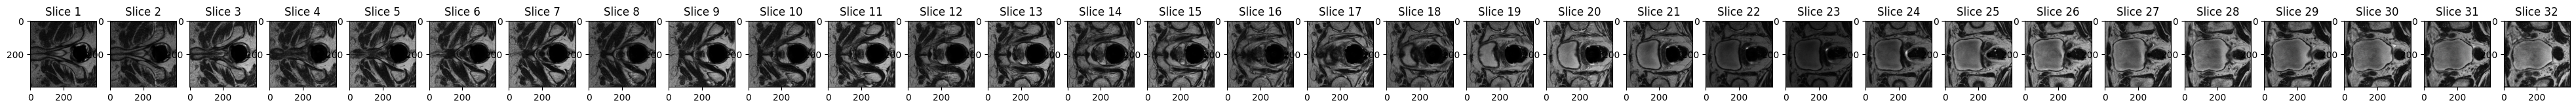

In [ ]:
# Showing Images
num_slices = train_images[30].shape[2]
fig, axes = plt.subplots(1, num_slices, figsize=(50, 50))
print(num_slices)

for i in range(num_slices):
    axes[i].imshow(train_images[30][:, :, i], cmap='gray')
    axes[i].set_title(f'Slice {i + 1}')

plt.show()

32


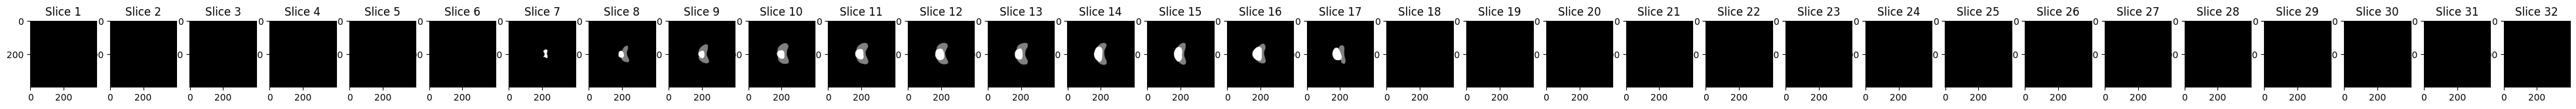

In [ ]:
# Showing Segmentation
num_slices = train_masks[30].shape[2]
fig, axes = plt.subplots(1, num_slices, figsize=(50, 50))
print(num_slices)

for i in range(num_slices):
    axes[i].imshow(train_masks[30][:, :, i], cmap='gray')
    axes[i].set_title(f'Slice {i + 1}')

plt.show()

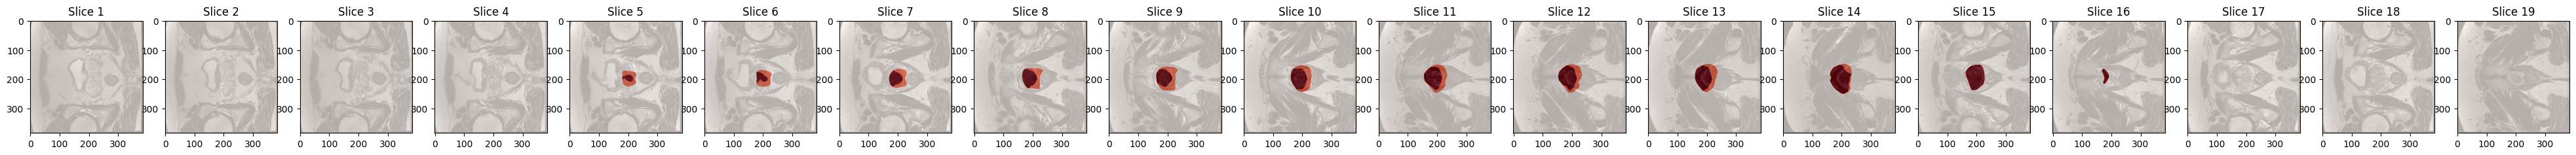

In [ ]:
# Showing Images and Masks

def display_image_with_mask(image, mask, alpha=0.7):
    num_slices = image.shape[2]
    fig, axes = plt.subplots(1, num_slices, figsize=(50, 50))

    for i in range(num_slices):

        axes[i].imshow(image[:, :, i], cmap='gray')
        axes[i].set_title(f'Slice {i + 1}')

        axes[i].imshow(mask[:, :, i], cmap='Reds', alpha=alpha)

    plt.show()

display_image_with_mask(test_images[0], test_masks[0])

Check whether the train images and masks are correctly loaded and correspond to eachother by randomly displaying 5 pairs of them

In [ ]:
import matplotlib.pyplot as plt

num_samples_to_visualize = 5

for i in range(num_samples_to_visualize):
    index = np.random.randint(len(train_images))

    image = train_images[index]
    mask = train_masks[index]

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(image[:, :, 10], cmap='gray')
    axes[0].set_title('Image')

    axes[1].imshow(mask[:, :, 10], cmap='gray')
    axes[1].set_title('Mask')

    plt.show()

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torchvision.transforms import functional as F

class ProstateMRIDataset(Dataset):
    def __init__(self, images, masks, transform=None):
        self.images = images
        self.masks = masks
        self.transform = transform
        self.target_size = (256, 256)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        mask = self.masks[idx]

        image = image.astype(np.float32)
        mask = mask.astype(np.float32)

        image = torch.from_numpy(image).unsqueeze(0)
        mask = torch.from_numpy(mask).unsqueeze(0)

        image = F.resize(image, self.target_size)
        mask = F.resize(mask, self.target_size, interpolation=F.InterpolationMode.NEAREST)

        return image, mask

In [ ]:
import numpy as np

def flatten_slices(images):
    return np.array([image[:, :, i] for image in images for i in range(image.shape[2])])

train_images_flatten = flatten_slices(train_images)
train_masks_flatten = flatten_slices(train_masks)

validation_images_flatten = flatten_slices(leaderboard_images)
validation_masks_flatten = flatten_slices(leaderboard_masks)

test_images_flatten = flatten_slices(test_images)
test_masks_flatten = flatten_slices(test_masks)

In [ ]:
train_dataset = ProstateMRIDataset(train_images_flatten, train_masks_flatten)
validation_dataset = ProstateMRIDataset(validation_images_flatten, validation_masks_flatten)
test_dataset = ProstateMRIDataset(test_images_flatten, test_masks_flatten)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)